# Experiments Adversarial

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../src')

import wandb

import torch
from torch.utils.data import DataLoader

from adversarial_sb.adversarial_ipfp import AdversarialIPFPTrainer
from adversarial_sb.models import SimpleConditional, SimpleCritic, Conditional, Critic
from adversarial_sb.data import MoonsDataset, CirclesDataset, LettersDataset, DigitsDataset, GaussianDataset, SwissRollDataset
from adversarial_sb.utils import visualize_losses, visualize_sb, visualize_sb_images, visualize_gamma

from cycle_gan.cycle_gan import CycleGANTrainer
from cycle_gan.gan import GAN
from cycle_gan.utils import visualize_cycle_gan


device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Two variate

In [2]:
batch_size = 1024

moons_set = MoonsDataset(4096)
circles_set = CirclesDataset(4096)

moons = DataLoader(moons_set, batch_size=batch_size, shuffle=True)
circles = DataLoader(circles_set, batch_size=batch_size, shuffle=True)

In [3]:
# Models parameters
data_dim = 2
hidden_dims = [256, 256, 256]

In [ ]:
discriminator_backward0 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)
discriminator_forward0 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)


conditional_p0 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)
conditional_q0 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)

trainer = AdversarialIPFPTrainer(
    conditional_p0,
    conditional_q0,
    discriminator_backward0,
    discriminator_forward0,
    gamma=0.1,
    lr_disc={'forward': 1e-6, 'backward': 1e-6},
    lr_gen={'forward': 1e-6, 'backward': 1e-6}, 
    device=device
)

losses0 = trainer.train(400, circles, moons, inner_steps=60)

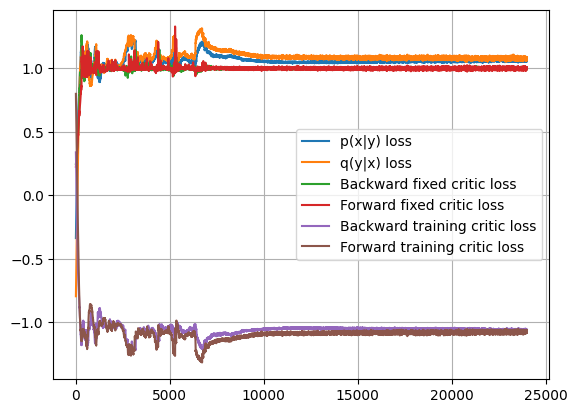

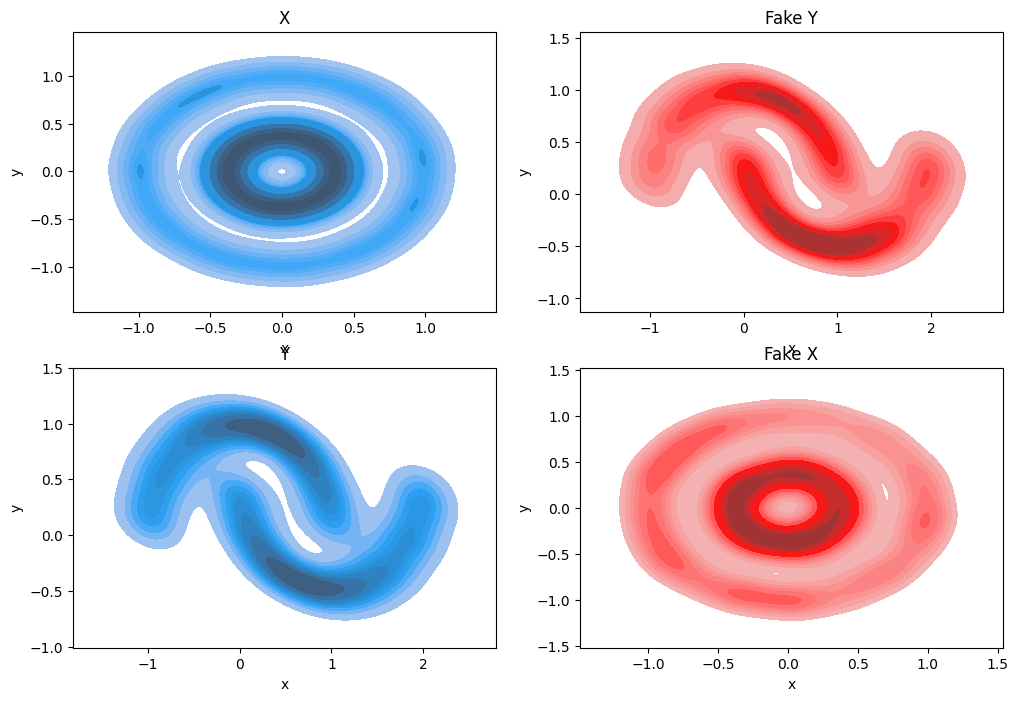

In [5]:
conditional_q0.cpu()
conditional_p0.cpu()

visualize_losses(losses0, trainer.loss_titles)
visualize_sb(conditional_p0, conditional_q0, circles_set, moons_set, num_samples=len(circles_set))

In [6]:
batch_size = 1024

swiss_roll_set = SwissRollDataset(4096)
gaussian_set = GaussianDataset(4096)

swiss_roll = DataLoader(swiss_roll_set, batch_size=batch_size, shuffle=True)
gaussian = DataLoader(gaussian_set, batch_size=batch_size, shuffle=True)

In [ ]:
discriminator_backward1 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)
discriminator_forward1 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)


conditional_p1 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)
conditional_q1 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)

trainer = AdversarialIPFPTrainer(
    conditional_p1,
    conditional_q1,
    discriminator_backward1,
    discriminator_forward1,
    gamma=0.1,
    lr_disc={'forward': 5e-7, 'backward': 5e-7},
    lr_gen={'forward': 5e-7, 'backward': 5e-7}, 
    device=device
)

losses1 = trainer.train(500, swiss_roll, gaussian, inner_steps=60)

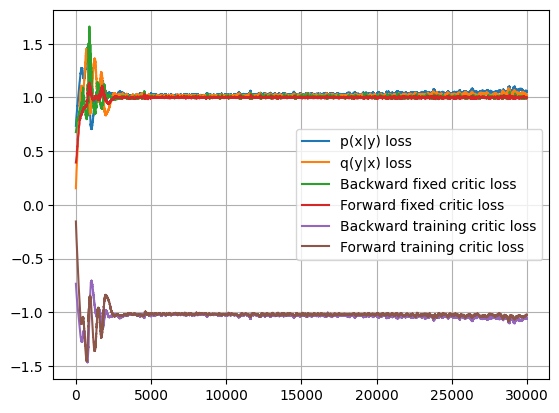

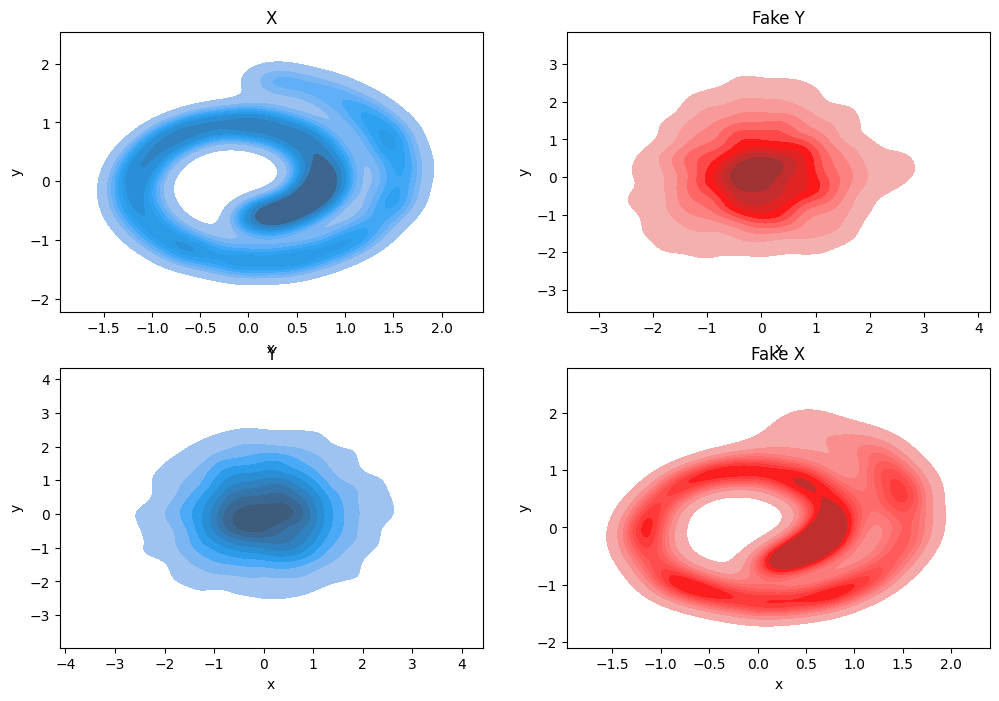

In [18]:
conditional_q1.cpu()
conditional_p1.cpu()

visualize_losses(losses1, trainer.loss_titles)
visualize_sb(conditional_p1, conditional_q1, swiss_roll_set, gaussian_set, num_samples=len(gaussian_set))

In [ ]:
discriminator_backward2 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)
discriminator_forward2 = SimpleCritic(data_dim, hidden_dims=hidden_dims).to(device)

conditional_p2 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)
conditional_q2 = SimpleConditional(data_dim, hidden_dims=hidden_dims).to(device)

trainer = AdversarialIPFPTrainer(
    conditional_p2,
    conditional_q2,
    discriminator_backward2,
    discriminator_forward2,
    gamma=0.001,
    lr_disc={'forward': 5e-7, 'backward': 5e-7},
    lr_gen={'forward': 5e-7, 'backward': 5e-7}, 
    device=device
)

losses2 = trainer.train(500, swiss_roll, gaussian, inner_steps=60)

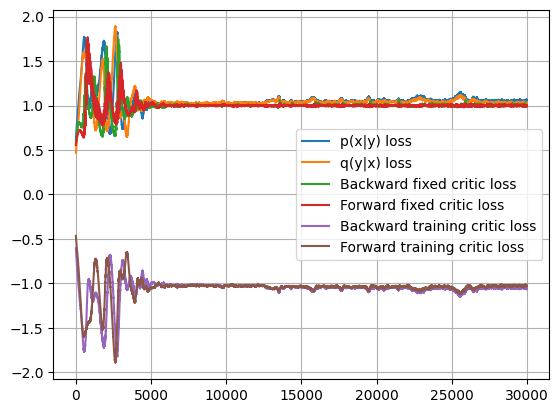

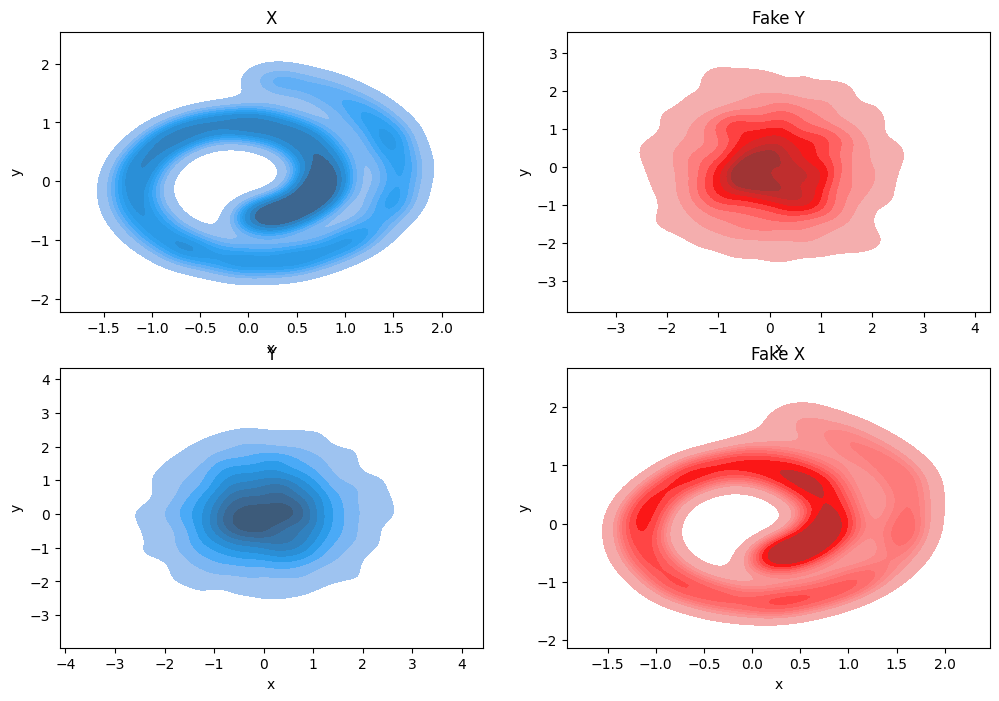

In [20]:
conditional_q2.cpu()
conditional_p2.cpu()

visualize_losses(losses2, trainer.loss_titles)
visualize_sb(conditional_p2, conditional_q2, swiss_roll_set, gaussian_set, num_samples=len(gaussian_set))

In [28]:
torch.save(conditional_p0.state_dict(), '../models/simple_conditional_p0.pt')
torch.save(conditional_q0.state_dict(), '../models/simple_conditional_q0.pt')

torch.save(conditional_p1.state_dict(), '../models/simple_conditional_p1.pt')
torch.save(conditional_q1.state_dict(), '../models/simple_conditional_q1.pt')

torch.save(conditional_p2.state_dict(), '../models/simple_conditional_p2.pt')
torch.save(conditional_q2.state_dict(), '../models/simple_conditional_q2.pt')

In [5]:
conditional_p1 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_q1 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_p1.load_state_dict(torch.load('../models/simple_conditional_p1.pt'))
conditional_q1.load_state_dict(torch.load('../models/simple_conditional_q1.pt'))
conditional_p1 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_q1 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_p1.load_state_dict(torch.load('../models/simple_conditional_p1.pt'))
conditional_q1.load_state_dict(torch.load('../models/simple_conditional_q1.pt'))

conditional_p2 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_q2 = SimpleConditional(data_dim, hidden_dims=hidden_dims)
conditional_p2.load_state_dict(torch.load('../models/simple_conditional_p2.pt'))
conditional_q2.load_state_dict(torch.load('../models/simple_conditional_q2.pt'))

<All keys matched successfully>

In [ ]:
gan_x = GAN().to(device)
gan_y = GAN().to(device)

cycle_gan_trainer = CycleGANTrainer(gan_x, gan_y, lr_disc=1e-3, lr_gen=1e-3, device=device)
losses_cycle_gan = cycle_gan_trainer.train(700, swiss_roll, gaussian)

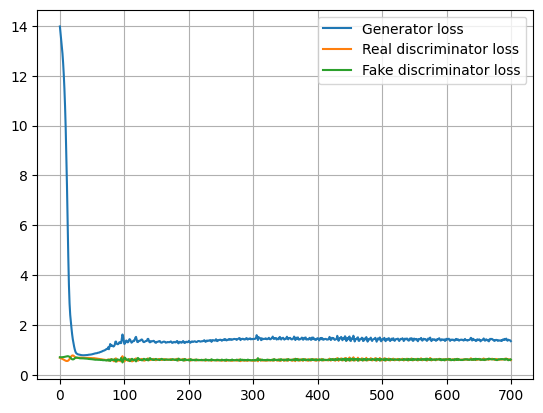

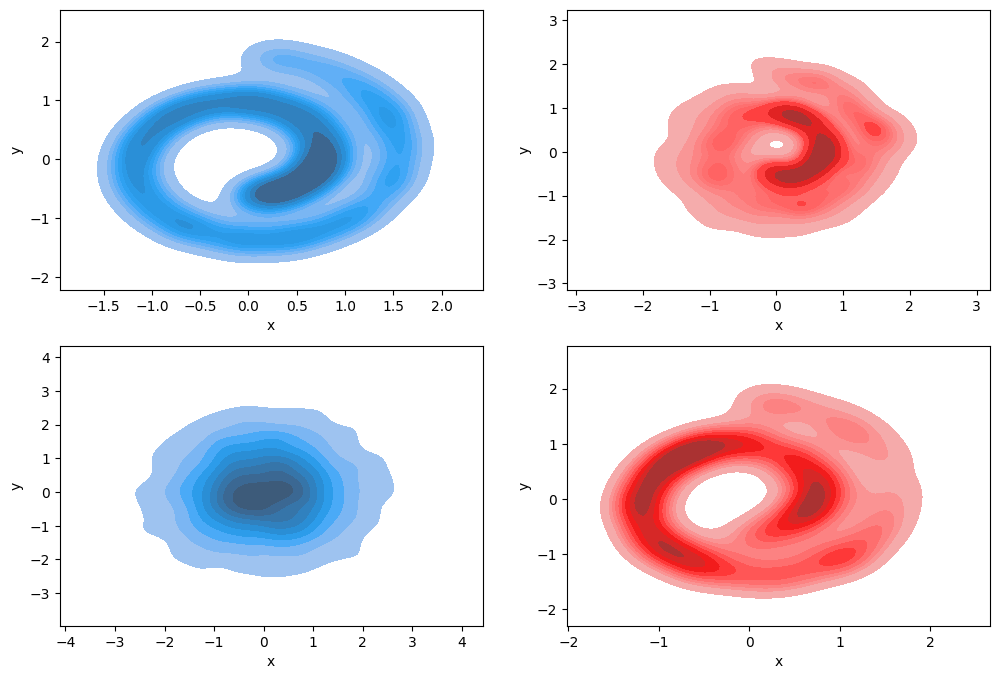

In [22]:
gan_x.cpu()
gan_y.cpu()

visualize_losses(losses_cycle_gan, cycle_gan_trainer.loss_titles)
visualize_cycle_gan(gan_x, gan_y, swiss_roll_set, gaussian_set)

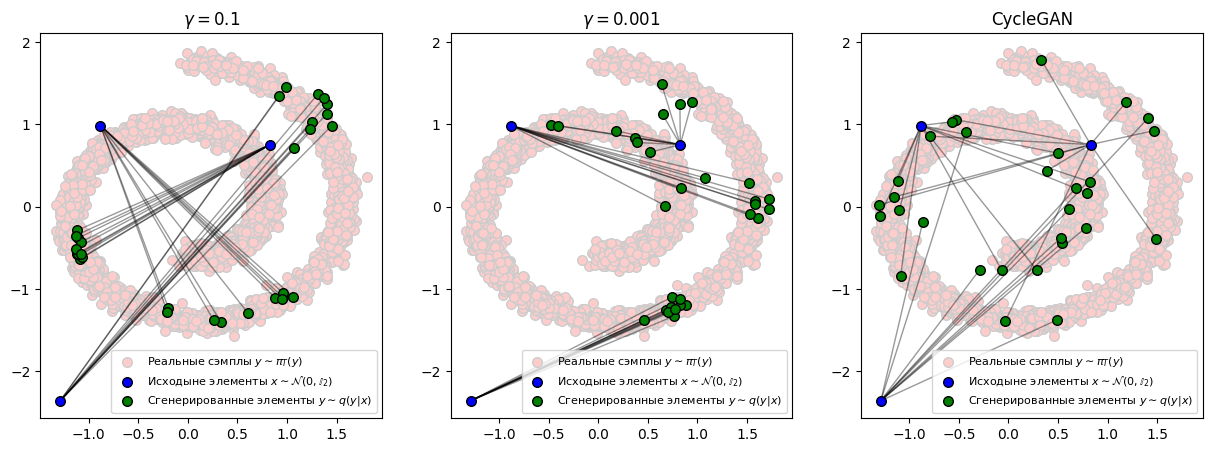

In [27]:
visualize_gamma([conditional_p1, conditional_p2, gan_x], gaussian_set, swiss_roll_set, titles=[r'$\gamma=0.1$', r'$\gamma=0.001$', 'CycleGAN'])

# Images: Letters $\rightarrow$ Digits

In [107]:
hyper_params = {
    'data': {
        'batch_size': 4096,
        'dataset': 'Letters <-> Digits'
    },
    'train': {
        'gamma': 1,
        'lr_disc': {'forward': 1e-6, 'backward': 1e-6},
        'lr_gen': {'forward': 1e-6, 'backward': 1e-6},
        'epochs': 400,
        'inner_steps': 60,
    }
}
batch_size = hyper_params['data']['batch_size']

letters_set = LettersDataset('../data/emnist/emnist-letters-train.csv')
digits_set = DigitsDataset('../data/emnist/emnist-mnist-train.csv')

letters = DataLoader(letters_set, batch_size=batch_size, shuffle=True)
digits = DataLoader(digits_set, batch_size=batch_size, shuffle=True)

In [ ]:
wandb.login()
wandb.init(
    project="adversarial-sb",
    notes="EMNIST",
    config=hyper_params
)

In [ ]:
discriminator_backward = Critic(hidden_dims=[]).to(device)
discriminator_forward = Critic(hidden_dims=[]).to(device)

conditional_p = Conditional(hidden_dims=[]).to(device)
conditional_q = Conditional(hidden_dims=[]).to(device)

trainer = AdversarialIPFPTrainer(
    conditional_p,
    conditional_q,
    discriminator_backward,
    discriminator_forward,
    gamma=hyper_params['train']['gamma'],
    lr_disc=hyper_params['train']['lr_disc'],
    lr_gen=hyper_params['train']['lr_gen'],
    device=device
)

losses = trainer.train(hyper_params['train']['epochs'], letters, digits, inner_steps=hyper_params['train']['inner_steps'])

In [ ]:
wandb.finish()

In [ ]:
conditional_q.to('cpu')
conditional_p.to('cpu')

conditional_q.eval()
conditional_p.eval()

visualize_sb_images(conditional_p, conditional_q, letters_set, digits_set, x_title='Letter', y_title='Digit', num_samples=16)

In [ ]:
torch.save(conditional_p.state_dict(), '../models/emnist_conditional_p.pt')
torch.save(conditional_q.state_dict(), '../models/emnist_conditional_q.pt')

In [ ]:
conditional_p = Conditional(hidden_dims=[256, 256])
conditional_p.load_state_dict(torch.load('../models/emnist_conditional_p.pt'))

conditional_q = Conditional(hidden_dims=[256, 256])
conditional_q.load_state_dict(torch.load('../models/emnist_conditional_q.pt'))

<All keys matched successfully>